# Introduction to Time Series

## What we will accomplish

In this notebook we will:
- Give a working definition of a time series
- Discuss what makes time series data different from the data we have seen so far. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from seaborn import set_style
set_style("whitegrid")

## What are time series data?

A <i>time series</i> is a sequence of data points $(\vec{x}_1, y_1), (\vec{x}_2, y_2), \dots (\vec{x}_t, y_t) \dots$ where $\vec{x}_t$ represents a collection of $p$ features and $y_t$ represents a numeric variable of interest at time $t$. For the purposes of these notes we will assume that our time steps are evenly spaced. Depending on the model and data set we may make additional assumptions on the $\vec{x}_t$ and $y_t$.

A slight departure from our regression data set up is that a time series may or may not come with a set of features. That is, if you work on forecasting problems it is possible that you will encounter data sets of the form $y_1, y_2, \dots, y_n$ with no corresponding $\vec{x}_1, \vec{x}_2, \dots, \vec{x}_n$.

## How is this different from our usual setup?

There are two main reasons to treat time series data differently from the data we have seen so far:

1. The past can influence the future, but the future cannot influence the past. Often our goal will be *forecasting*: predicting the values of the $p_{n+1}$, $p_{n+2}$, ..., $p_{n+h}$ for some *forecasting horizon* $h$ given the values for $i = 1, 2, 3, ..., n$.
    * For this reason *random* data splits will be ill advised for model evaluation.  We should make splits which respect the arrow of time.
2. We have been assuming that $p_i = (\vec{x}_i, y_i)$ are independently drawn from some joint distribution.  For most time series $p_{i+1}$ will *not* be independent from $p_i$.  This will impact our approach to model fitting and inference.

## Two examples

##### Sunspots

Here is a time series of the form $y_1, y_2, \dots, y_n$ with no corresponding $\vec{x}_1, \vec{x}_2, \dots, \vec{x}_n$.

It records the number of sunspots each year since the year 1700.

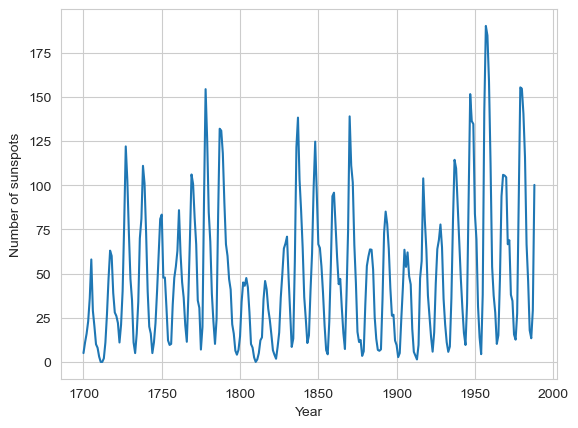

In [3]:
df = pd.read_csv('../../data/sunspot.year.csv', index_col=[0])
df.columns = ['year', 'sunspots']

plt.plot(df.year, df.sunspots)
plt.xlabel('Year')
plt.ylabel('Number of sunspots')
plt.show()

If we are interested in forecasting we might care about a forecasting horizon of one just one year, or we might care about predicting multiple years out. The further out we want to predict the less certain we should be about our predictions.

##### Interest rates and inflation

Here is an example of a time series with both $x_i$ and $y_i$.

In Sweden, the Riksbank (the central bank, similar to our Federal Reserve) employs interest rate adjustments as a key strategy to manage inflation.

In [30]:
df = pd.read_csv('../../data/interest_and_inflation.csv')

# Selecting the data of interest
df = df.iloc[:94, :3]

# Making the entries all floats
df = df.astype(float)

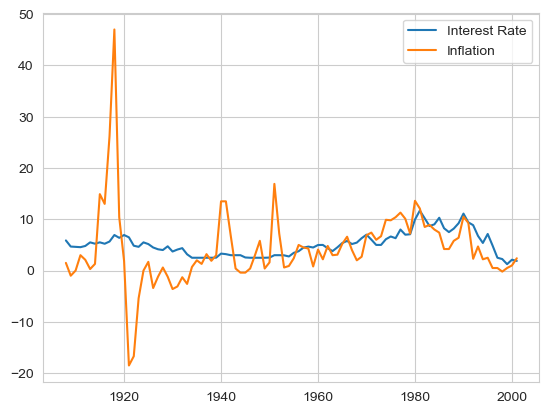

In [31]:
plt.plot(df.iloc[:,0], df.iloc[:,1], label = 'Interest Rate')
plt.plot(df.iloc[:,0], df.iloc[:,2], label = 'Inflation')
plt.legend()
plt.show()

Here we might be interested in forecasting the inflating rate while having control over the interest rate.  So when predicting the inflation rate at time $t$ we can use the values of the inflation rate at times $1, 2, 3, ..., t - 1$ and the interest rate at times $1, 2, 3, ..., t$.